In [1]:
import pandas as pd


In [2]:
results_mean = pd.read_csv('fig2_metrics/metrics_10samples_mean.csv', index_col=0)
results_std = pd.read_csv('fig2_metrics/metrics_10samples_std.csv', index_col=0)

In [3]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio
model,,,,,,,,
Geneformer-V2-104M_continue,0.132125,0.093646,0.449763,0.651942,0.418324,0.741147,0.028508,0.225178
Geneformer-V2-104M_CLcancer,0.645251,0.514200,0.510320,0.971171,0.440223,0.838717,0.176026,0.556591
hvg,0.529901,0.273609,0.508888,0.964233,0.481091,0.949740,0.221017,0.437466
Geneformer-V2-316M,0.700057,0.586078,0.508586,0.967275,0.452871,0.862072,0.180236,0.598240
Geneformer-V2-104M,0.678425,0.593372,0.503175,0.952504,0.438151,0.820918,0.164897,0.591657
scgpt_cancer,0.745259,0.721383,0.562157,0.979056,0.440640,0.865153,0.205515,0.676266
scfoundation,0.702408,0.616154,0.571072,0.987191,0.467736,0.860934,0.177266,0.629878
scgpt,0.722836,0.678109,0.563236,0.978776,0.440649,0.842785,0.162533,0.654727
cellplm,0.729683,0.663955,0.585740,0.986393,0.467589,0.857019,0.220674,0.659793


In [4]:
# %run analysis_utils.py

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# models_map= {
# 'hvg': 'HVG',
# 'pca': 'PCA',
# 'scgpt': 'scGPT', 
# 'scgpt_cancer': 'scGPT [cancer]',
# 'scvi':'scVI',
# 'gf-6L-30M-i2048': 'Geneformer-V1',
# 'gf-6L-30M-i2048_continue': 'Geneformer-V1 [continue]',
# 'Geneformer-V2-104M_CLcancer': 'Geneformer-V2 [cancer]',
# 'Geneformer-V2-104M': 'Geneformer-V2',
# 'Geneformer-V2-104M_continue': 'Geneformer-V2 [continue]',
# 'Geneformer-V2-316M': 'Geneformer-V2-316M'


# }

# models_map= {
# 'hvg': 'HVG',
# 'pca': 'PCA',
# 'scgpt': 'scGPT', 
# 'scgpt_cancer': 'scGPT [cancer]',
# 'scvi':'scVI',
# 'scvi_donor_id':'scVI',

# 'gf-6L-30M-i2048': 'GF-V1',
# 'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
# 'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
# 'Geneformer-V2-104M': 'GF-V2',
# 'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
# 'Geneformer-V2-316M': 'GF-V2-Deep',
# 'scfoundation': 'scFoundation'

# }
model_name_map={
'hvg': 'HVG',
'pca': 'PCA',
'scgpt': 'scGPT', 
'scgpt_cancer': 'scGPT [cancer]',
'scvi':'scVI',
'scvi_donor_id':'scVI',
'scfoundation':'scFoundation',
'scimilarity':'SCimiarity',
'cellplm':'CellPLM',
'gf-6L-30M-i2048': 'GF-V1',
'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
'Geneformer-V2-104M': 'GF-V2',
'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
'Geneformer-V2-316M': 'GF-V2-Deep',
'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

}


def map_groups(exp):
    exp = exp.lower()
    if 'gf' in exp:
        return 'Geneformer'
    elif 'geneformer' in exp:
        return 'Geneformer'
    elif 'scfoundation' in exp:
        return 'Other'
    elif 'scimilarity' in exp:
        return 'Other'
    elif 'scgpt' in exp:
        return 'scGPT'
    elif 'cellplm' in exp:
        return 'Other'
    
    elif any(x in exp for x in ['hvg', 'pca', 'scvi']):
        return 'Baseline'
    else:
        return 'Other'  # optional fallback
    
import seaborn as sns

def plot_groups(data_df, cols=['ASW_label', 'NMI_label']):
    assert all(col in data_df.columns for col in cols), "One or more columns not found in data"
    assert 'group' in data_df.columns

    # Use Seaborn color palette for a modern look
    palette = sns.color_palette("Set2", n_colors=len(cols))
    column_colors = {col: palette[i] for i, col in enumerate(cols)}

    fig, ax = plt.subplots(figsize=(14, 6))
    labels = []
    xticks = []
    shift = 0
    gap = 1
    bar_width = 0.8 / len(cols)

    groups = sorted(data_df.group.unique())
    for g in groups:
        subset = data_df[data_df.group == g].copy().sort_values(cols[0])
        num_items = len(subset)

        for i, col in enumerate(cols):
            values = subset[col].values
            x_pos = shift + np.arange(num_items) + i * bar_width
            ax.bar(
                x_pos, values, 
                width=bar_width, 
                label=col if shift == 0 else None, 
                color=column_colors[col],
                edgecolor='white'
            )

            if i == 0:
                labels.extend(subset.index)
                xticks.extend(shift + np.arange(num_items) + (len(cols) / 2 - 0.5) * bar_width)

        shift += num_items + gap

    # Format axes and title
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, rotation=90, fontsize=16)
    ax.set_ylim(0.2, 0.9)
    ax.legend( frameon=False, loc='upper right', fontsize=12)

    # Remove spines for a clean look
    sns.despine(ax=ax, left=True, right=True, top=True)
    ax.tick_params(axis='y', length=0)

    # ax.set_title("Comparison of Metrics by Group", fontsize=14, weight='bold')
    ax.set_ylabel("Score", fontsize=16)
    plt.tight_layout()
    return fig

In [6]:
results_mean['group'] = results_mean.index.map(map_groups)

In [7]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
model,,,,,,,,,
Geneformer-V2-104M_continue,0.132125,0.093646,0.449763,0.651942,0.418324,0.741147,0.028508,0.225178,Geneformer
Geneformer-V2-104M_CLcancer,0.645251,0.514200,0.510320,0.971171,0.440223,0.838717,0.176026,0.556591,Geneformer
hvg,0.529901,0.273609,0.508888,0.964233,0.481091,0.949740,0.221017,0.437466,Baseline
Geneformer-V2-316M,0.700057,0.586078,0.508586,0.967275,0.452871,0.862072,0.180236,0.598240,Geneformer
Geneformer-V2-104M,0.678425,0.593372,0.503175,0.952504,0.438151,0.820918,0.164897,0.591657,Geneformer
scgpt_cancer,0.745259,0.721383,0.562157,0.979056,0.440640,0.865153,0.205515,0.676266,scGPT
scfoundation,0.702408,0.616154,0.571072,0.987191,0.467736,0.860934,0.177266,0.629878,Other
scgpt,0.722836,0.678109,0.563236,0.978776,0.440649,0.842785,0.162533,0.654727,scGPT
cellplm,0.729683,0.663955,0.585740,0.986393,0.467589,0.857019,0.220674,0.659793,Other


In [9]:
results_mean = results_mean[~results_mean.index.str.startswith('__')]

In [10]:
results_mean.index = results_mean.index.map(model_name_map)

In [11]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
model,,,,,,,,,
GF-V2 [continue],0.132125,0.093646,0.449763,0.651942,0.418324,0.741147,0.028508,0.225178,Geneformer
GF-V2 [cancer],0.645251,0.514200,0.510320,0.971171,0.440223,0.838717,0.176026,0.556591,Geneformer
HVG,0.529901,0.273609,0.508888,0.964233,0.481091,0.949740,0.221017,0.437466,Baseline
GF-V2-Deep,0.700057,0.586078,0.508586,0.967275,0.452871,0.862072,0.180236,0.598240,Geneformer
GF-V2,0.678425,0.593372,0.503175,0.952504,0.438151,0.820918,0.164897,0.591657,Geneformer
scGPT [cancer],0.745259,0.721383,0.562157,0.979056,0.440640,0.865153,0.205515,0.676266,scGPT
scFoundation,0.702408,0.616154,0.571072,0.987191,0.467736,0.860934,0.177266,0.629878,Other
scGPT,0.722836,0.678109,0.563236,0.978776,0.440649,0.842785,0.162533,0.654727,scGPT
CellPLM,0.729683,0.663955,0.585740,0.986393,0.467589,0.857019,0.220674,0.659793,Other


In [12]:
results_mean['NMI'] = results_mean['NMI_cluster/label']
results_mean['ARI'] = results_mean['ARI_cluster/label']
results_mean['ASW'] = results_mean['ASW_label']

/var/tmp/ipykernel_35548/797617879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_mean['NMI'] = results_mean['NMI_cluster/label']
/var/tmp/ipykernel_35548/797617879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_mean['ARI'] = results_mean['ARI_cluster/label']
/var/tmp/ipykernel_35548/797617879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [13]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group,NMI,ARI,ASW
model,,,,,,,,,,,,
GF-V2 [continue],0.132125,0.093646,0.449763,0.651942,0.418324,0.741147,0.028508,0.225178,Geneformer,0.132125,0.093646,0.449763
GF-V2 [cancer],0.645251,0.514200,0.510320,0.971171,0.440223,0.838717,0.176026,0.556591,Geneformer,0.645251,0.514200,0.510320
HVG,0.529901,0.273609,0.508888,0.964233,0.481091,0.949740,0.221017,0.437466,Baseline,0.529901,0.273609,0.508888
GF-V2-Deep,0.700057,0.586078,0.508586,0.967275,0.452871,0.862072,0.180236,0.598240,Geneformer,0.700057,0.586078,0.508586
GF-V2,0.678425,0.593372,0.503175,0.952504,0.438151,0.820918,0.164897,0.591657,Geneformer,0.678425,0.593372,0.503175
scGPT [cancer],0.745259,0.721383,0.562157,0.979056,0.440640,0.865153,0.205515,0.676266,scGPT,0.745259,0.721383,0.562157
scFoundation,0.702408,0.616154,0.571072,0.987191,0.467736,0.860934,0.177266,0.629878,Other,0.702408,0.616154,0.571072
scGPT,0.722836,0.678109,0.563236,0.978776,0.440649,0.842785,0.162533,0.654727,scGPT,0.722836,0.678109,0.563236
CellPLM,0.729683,0.663955,0.585740,0.986393,0.467589,0.857019,0.220674,0.659793,Other,0.729683,0.663955,0.585740


In [14]:
results_mean_plot =results_mean.drop('GF-V2 [continue]').copy()

In [15]:
results_mean_plot = results_mean_plot[['NMI', 'ARI', 'ASW', 'group']].copy()

In [16]:
results_mean_plot

,NMI,ARI,ASW,group
model,,,,
GF-V2 [cancer],0.645251,0.514200,0.510320,Geneformer
HVG,0.529901,0.273609,0.508888,Baseline
GF-V2-Deep,0.700057,0.586078,0.508586,Geneformer
GF-V2,0.678425,0.593372,0.503175,Geneformer
scGPT [cancer],0.745259,0.721383,0.562157,scGPT
scFoundation,0.702408,0.616154,0.571072,Other
scGPT,0.722836,0.678109,0.563236,scGPT
CellPLM,0.729683,0.663955,0.585740,Other
SCimiarity,0.716963,0.543718,0.647940,Other


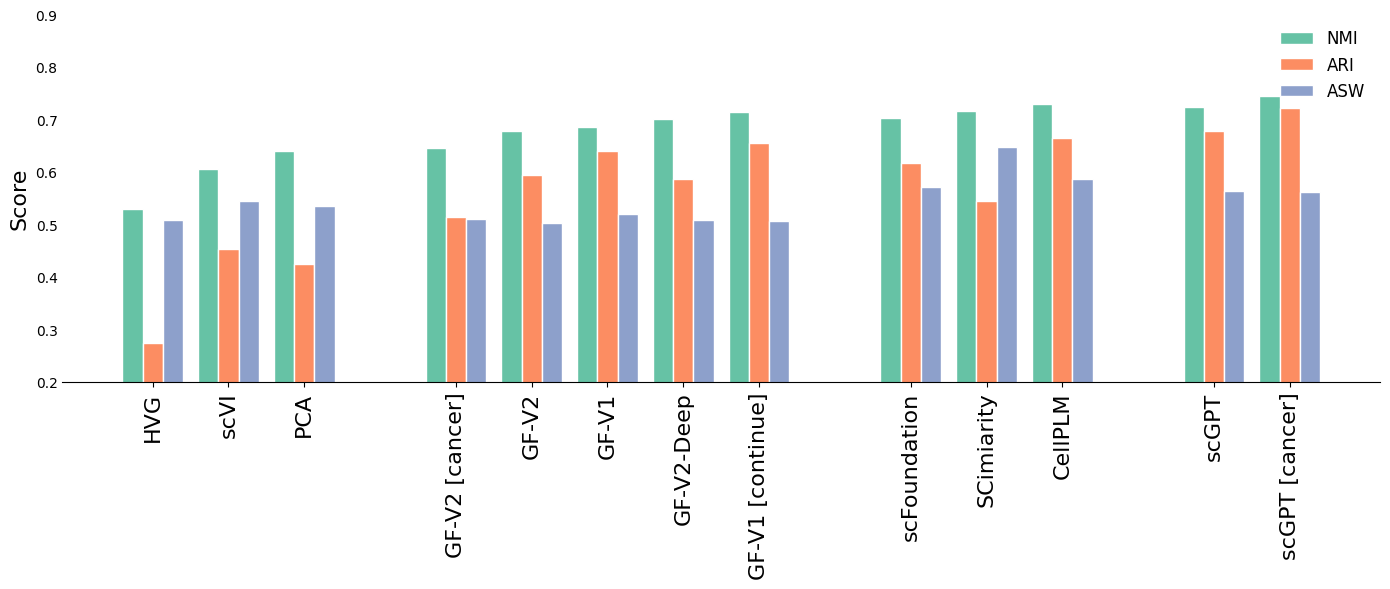

In [25]:
fig = plot_groups(results_mean_plot, cols=['NMI', 'ARI', 'ASW'])

In [26]:
fig.savefig('./fig2_metrics/sub_compare_embedding_metrics.png', dpi=100)

## violinplot

In [31]:
results_10_runs = pd.read_csv('./fig2_metrics/metrics_10_runs.csv')

In [32]:
results_10_runs

,method,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
0,Geneformer-V2-104M_continue,0.134121,0.098236,0.453388,0.657449,0.414078,0.712715,0.028421,0.228582,geneformer
1,Geneformer-V2-104M_continue,0.128249,0.090002,0.449664,0.650927,0.420008,0.739867,0.027659,0.222638,geneformer
2,Geneformer-V2-104M_continue,0.141969,0.099828,0.451788,0.673212,0.421370,0.719246,0.026274,0.231195,geneformer
3,Geneformer-V2-104M_continue,0.137627,0.105614,0.450572,0.666717,0.415430,0.732193,0.027073,0.231271,geneformer
4,Geneformer-V2-104M_continue,0.121275,0.072926,0.450288,0.643840,0.421568,0.746291,0.033147,0.214830,geneformer
...,...,...,...,...,...,...,...,...,...,...
145,gf-6L-30M-i2048_continue,0.718855,0.658419,0.501190,0.989958,0.474005,0.890504,0.143167,0.626154,geneformer
146,gf-6L-30M-i2048_continue,0.696219,0.612869,0.513231,0.986267,0.473419,0.864790,0.148172,0.607440,geneformer
147,gf-6L-30M-i2048_continue,0.734348,0.673265,0.498074,0.984783,0.471381,0.883110,0.152225,0.635229,geneformer
148,gf-6L-30M-i2048_continue,0.686989,0.636090,0.505325,0.966367,0.470416,0.878100,0.149466,0.609468,geneformer


In [33]:
nmi_df = results_10_runs[['method', 'NMI_cluster/label', 'group']].copy()
nmi_df.columns= ['method', 'NMI', 'group']

In [34]:
nmi_df['method'].unique()

array(['Geneformer-V2-104M_continue', 'Geneformer-V2-104M_CLcancer',
       'hvg', 'Geneformer-V2-316M', 'Geneformer-V2-104M', 'scgpt_cancer',
       'scfoundation', 'scgpt', 'cellplm', 'scimilarity', 'pca', '__scvi',
       'gf-6L-30M-i2048', 'scvi', 'gf-6L-30M-i2048_continue'],
      dtype=object)

In [35]:
ind = nmi_df.method.str.startswith('__')
nmi_df = nmi_df[~ind]

In [36]:
nmi_df['method'] = nmi_df['method'].map(model_name_map)

In [37]:
nmi_df

,method,NMI,group
0,GF-V2 [continue],0.134121,geneformer
1,GF-V2 [continue],0.128249,geneformer
2,GF-V2 [continue],0.141969,geneformer
3,GF-V2 [continue],0.137627,geneformer
4,GF-V2 [continue],0.121275,geneformer
...,...,...,...
145,GF-V1 [continue],0.718855,geneformer
146,GF-V1 [continue],0.696219,geneformer
147,GF-V1 [continue],0.734348,geneformer
148,GF-V1 [continue],0.686989,geneformer


In [38]:
nmi_df = nmi_df[nmi_df['method'] != 'GF-V2 [continue]']

In [39]:

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import ttest_ind
# import itertools
# import matplotlib.gridspec as gridspec
# # nmi_df = nmi_df.reset_index()
# sns.set(style="whitegrid")

# # Get unique groups and count number of methods per group
# group_method_counts = nmi_df.groupby("group")["method"].nunique()
# total_methods = group_method_counts.sum()

# # Create grid with proportional width ratios
# fig = plt.figure(figsize=(6 * len(group_method_counts)/2, 6))
# gs = gridspec.GridSpec(1, len(group_method_counts), width_ratios=group_method_counts.values, figure=fig)

# # Plot each group
# for idx, (group, method_count) in enumerate(group_method_counts.items()):
#     ax = fig.add_subplot(gs[0, idx])
#     subset = nmi_df[nmi_df['group'] == group].copy()
#     # ax.grid(False)
#     # Sort methods by mean
#     method_stats = subset.groupby("method")["NMI"].median().sort_values(ascending=True)
#     ordered_methods = method_stats.index.tolist()
#     subset["method"] = pd.Categorical(subset["method"], categories=ordered_methods, ordered=True)

#     # Violin plot
#     sns.violinplot(
#         data=subset,
#         x="method",
#         y="NMI",
#         ax=ax,
#         inner="quartile",
#         scale="area",
#         # cut=0,
#         width=0.5
#     )

#     # Add line plot for means
#     stat_values = subset.groupby("method")["NMI"].median()[ordered_methods].values
#     ax.plot(range(len(ordered_methods)), stat_values, marker='o', linestyle='--', color='black', label='Mean')

#     ax.set_title(f"{group}")
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     ax.set_xlabel('')
#     ax.set_ylim(0.4, .8)
#     if idx !=0 :
#         ax.set_yticklabels([])  # Hide the tick labels only, keep ticks and grid
#         ax.set_ylabel("")       # Remove the y-axis label (optional)
#         # ax.tick_params(axis='y', which='both', left=False)  # Remove tick marks

# # for i, ax in enumerate(axes):
# #     if i != 0:
# #         ax.set_yticks([])             # Remove y-axis ticks
# #         ax.set_ylabel("")             # Remove y-axis label (if any)
# #         ax.tick_params(axis='y', which='both', left=False)  # Remove tick marks
        
# # Overall title and layout
# # fig.suptitle("NMI_cluster/label Distribution by Method (Adaptive Width, Sorted, Mean Line)", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

In [40]:
# fig.savefig('./metrics/NMI.png', dpi=100)

## Testing

In [41]:
nmi_df['method'].unique()

array(['GF-V2 [cancer]', 'HVG', 'GF-V2-Deep', 'GF-V2', 'scGPT [cancer]',
       'scFoundation', 'scGPT', 'CellPLM', 'SCimiarity', 'PCA', 'GF-V1',
       'scVI', 'GF-V1 [continue]'], dtype=object)

In [42]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import itertools

# Load the data (adjust path as needed)
# nmi_df = pd.read_csv("nmi.csv")

# Perform all pairwise t-tests
all_methods = sorted(nmi_df['method'].unique())
pairwise_results = []

# Store group mapping for each method
method_to_group = nmi_df.drop_duplicates('method')[['method', 'group']].set_index('method')['group'].to_dict()

for m1, m2 in itertools.combinations(all_methods, 2):
    vals1 = nmi_df[nmi_df['method'] == m1]['NMI']
    vals2 = nmi_df[nmi_df['method'] == m2]['NMI']
    
    if len(vals1) > 1 and len(vals2) > 1:
        stat, pval = ttest_ind(vals1, vals2)
        mean1, mean2 = vals1.mean(), vals2.mean()
        mean_diff = mean1 - mean2
        pairwise_results.append({
            'method1': m1,
            'group1': method_to_group.get(m1, 'unknown'),
            'method2': m2,
            'group2': method_to_group.get(m2, 'unknown'),
            'mean1': mean1,
            'mean2': mean2,
            'mean_diff': mean_diff,
            'statistic': stat,
            'raw_p': pval
        })

# Convert to DataFrame
pairwise_df = pd.DataFrame(pairwise_results)

# Apply FDR correction
_, corrected_pvals, _, _ = multipletests(pairwise_df['raw_p'], method='fdr_bh')
pairwise_df['FDR_adj_p'] = corrected_pvals
pairwise_df['significant'] = pairwise_df['FDR_adj_p'] < 0.05
pairwise_df['direction'] = pairwise_df['mean_diff'].apply(lambda x: '>' if x > 0 else '<')

# Organize columns
pairwise_df = pairwise_df[[
    'group1', 'method1', 'group2', 'method2',
    'mean1', 'mean2', 'direction', 'mean_diff',
    'statistic', 'raw_p', 'FDR_adj_p', 'significant'
]]

# Optional: sort for readability
pairwise_df.sort_values(by=['group1', 'method1', 'group2', 'method2'], inplace=True)

# Display table
print(pairwise_df.to_string(index=False))

      group1          method1       group2          method2    mean1    mean2 direction  mean_diff  statistic        raw_p    FDR_adj_p  significant
    baseline              HVG     baseline              PCA 0.529901 0.639654         <  -0.109754 -15.923508 4.724174e-12 3.349869e-11         True
    baseline              HVG     baseline             scVI 0.529901 0.605745         <  -0.075844 -11.134877 1.666732e-09 6.842375e-09         True
    baseline              HVG        other       SCimiarity 0.529901 0.716963         <  -0.187062 -27.802881 3.066426e-16 4.848955e-15         True
    baseline              HVG scFoundation     scFoundation 0.529901 0.702408         <  -0.172507 -28.161912 2.446088e-16 4.848955e-15         True
    baseline              HVG        scgpt            scGPT 0.529901 0.722836         <  -0.192935 -19.375376 1.664566e-13 1.622952e-12         True
    baseline              HVG        scgpt   scGPT [cancer] 0.529901 0.745259         <  -0.215358 -27.781

In [43]:
pairwise_df = pairwise_df.round(3)

In [44]:
pairwise_df.to_csv('./fig2_metrics/stats_test.csv')

In [28]:
# n = len(ordered_methods)
# pairs= []
# for i in range(n):
#     for j in range(i + 1, n):
#         pairs.append((ordered_methods[i], ordered_methods[j]))

In [45]:
nmi_df

,method,NMI,group
10,GF-V2 [cancer],0.694601,geneformer
11,GF-V2 [cancer],0.634002,geneformer
12,GF-V2 [cancer],0.603562,geneformer
13,GF-V2 [cancer],0.588440,geneformer
14,GF-V2 [cancer],0.674633,geneformer
...,...,...,...
145,GF-V1 [continue],0.718855,geneformer
146,GF-V1 [continue],0.696219,geneformer
147,GF-V1 [continue],0.734348,geneformer
148,GF-V1 [continue],0.686989,geneformer


scGPT [cancer] CellPLM
scGPT [cancer] scGPT
scGPT [cancer] SCimiarity
scGPT [cancer] GF-V1 [continue]
scGPT [cancer] scFoundation
scGPT [cancer] GF-V2-Deep
scGPT [cancer] GF-V1
scGPT [cancer] GF-V2
scGPT [cancer] GF-V2 [cancer]
scGPT [cancer] PCA
scGPT [cancer] scVI
scGPT [cancer] HVG
CellPLM scGPT [cancer]
CellPLM scGPT
CellPLM SCimiarity
CellPLM GF-V1 [continue]
CellPLM scFoundation
CellPLM GF-V2-Deep
CellPLM GF-V1
CellPLM GF-V2
CellPLM GF-V2 [cancer]
CellPLM PCA
CellPLM scVI
CellPLM HVG
scGPT scGPT [cancer]
scGPT CellPLM
scGPT SCimiarity
scGPT GF-V1 [continue]
scGPT scFoundation
scGPT GF-V2-Deep
scGPT GF-V1
scGPT GF-V2
scGPT GF-V2 [cancer]
scGPT PCA
scGPT scVI
scGPT HVG
SCimiarity scGPT [cancer]
SCimiarity CellPLM
SCimiarity scGPT
SCimiarity GF-V1 [continue]
SCimiarity scFoundation
SCimiarity GF-V2-Deep
SCimiarity GF-V1
SCimiarity GF-V2
SCimiarity GF-V2 [cancer]
SCimiarity PCA
SCimiarity scVI
SCimiarity HVG
GF-V1 [continue] scGPT [cancer]
GF-V1 [continue] CellPLM
GF-V1 [continue] sc

/var/tmp/ipykernel_16117/1471727582.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


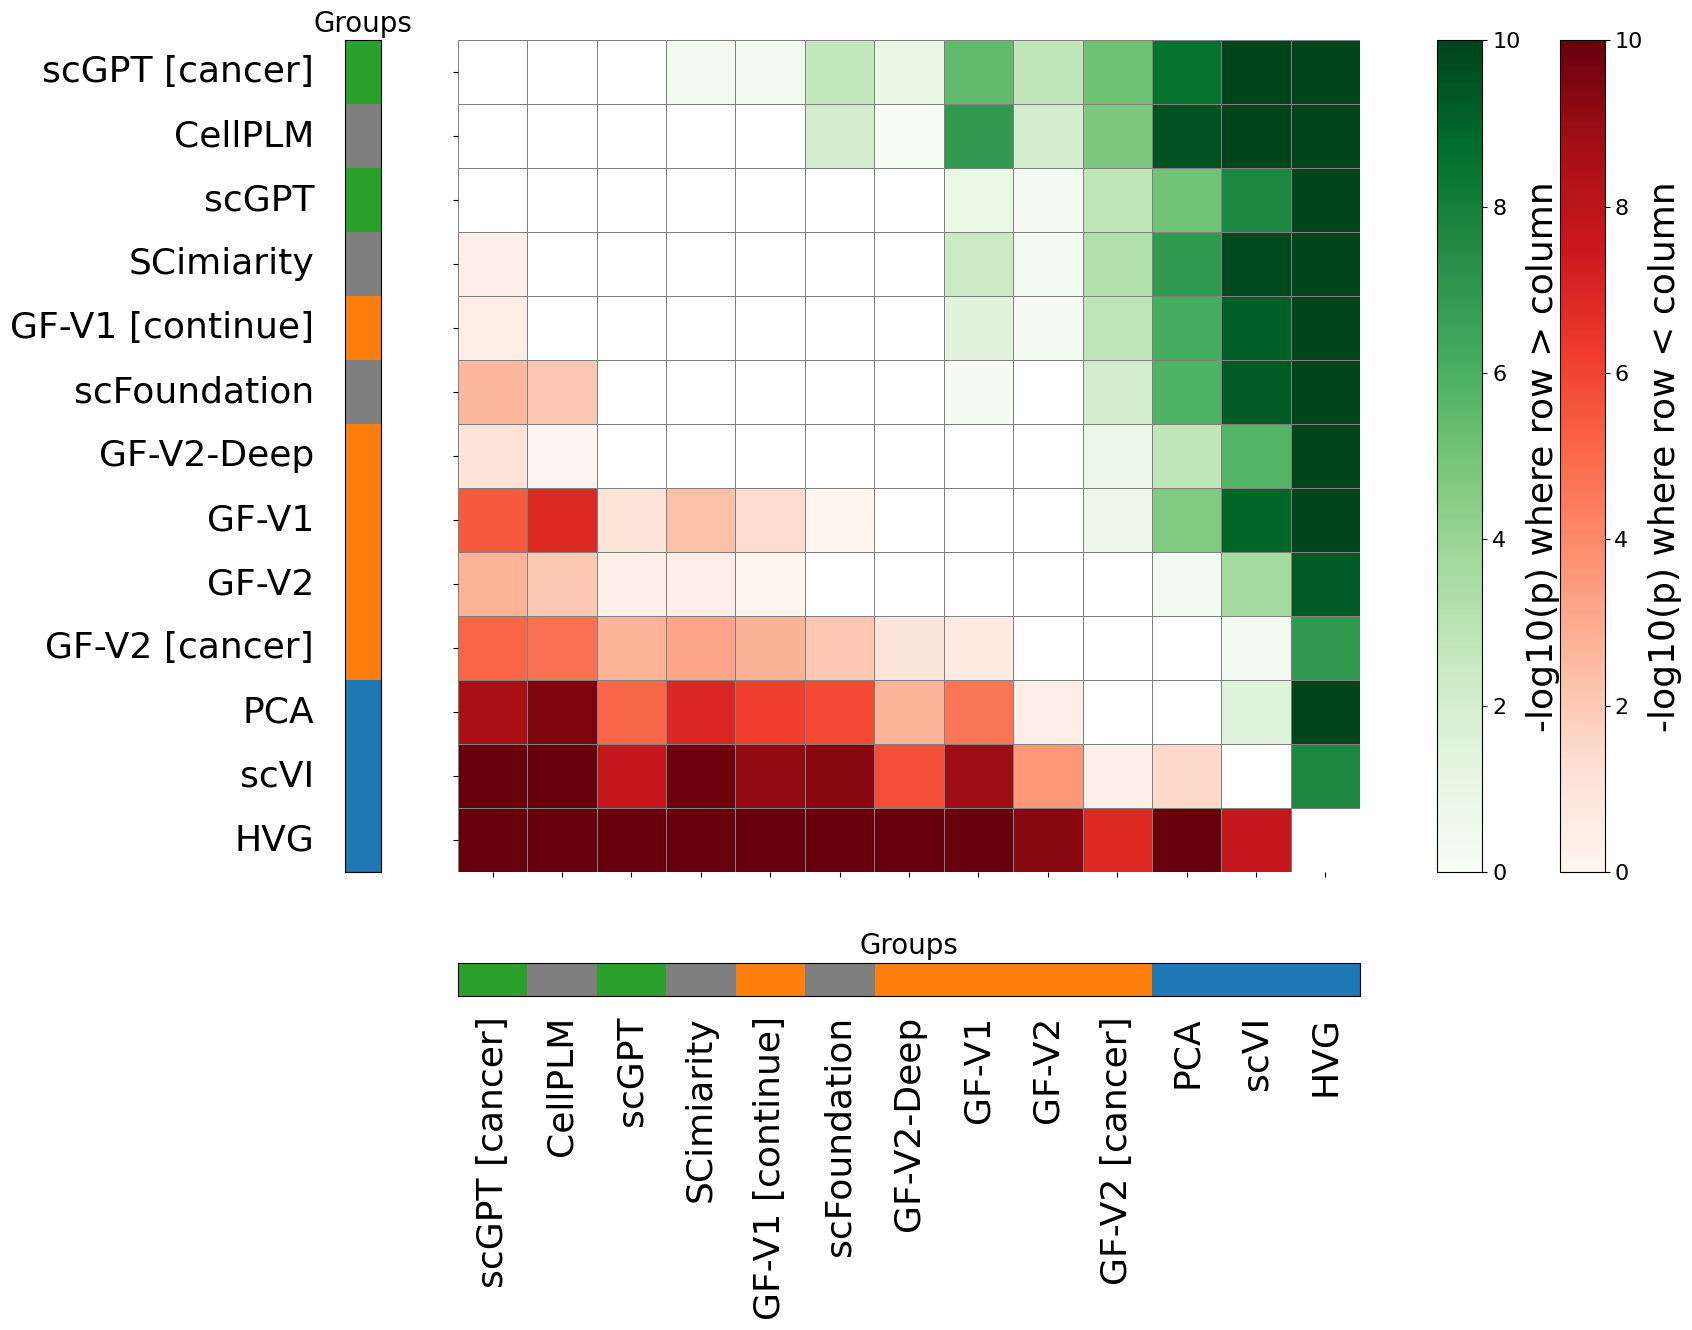

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind
import itertools



group_colors = {
    'Baseline': '#1f77b4',
    'Geneformer': '#ff7f0e',
    'scGPT': '#2ca02c',
    'other': '#7f7f7f',
    'Other': '#7f7f7f'
}

def get_pairwise_tests(nmi_df, ordered_methods):
    pairwise_results = []
    
    for m1, m2 in itertools.permutations(ordered_methods, 2):
    # for m1, m2 in pairs:
        print(m1, m2)
        vals1 = nmi_df[nmi_df['method'] == m1]['NMI']
        vals2 = nmi_df[nmi_df['method'] == m2]['NMI']
        if len(vals1) > 1 and len(vals2) > 1:
            stat, pval = ttest_ind(vals1, vals2)
            mean_diff = vals1.mean() - vals2.mean()
            pairwise_results.append({
                'method1': m1, 'method2': m2,
                'mean_diff': mean_diff, 'p_value': pval
            })

    pairwise_df = pd.DataFrame(pairwise_results)
    _, corrected_pvals, _, _ = multipletests(pairwise_df['p_value'], method='fdr_bh')
    pairwise_df['FDR_adj_p'] = corrected_pvals
    pairwise_df['significant'] = pairwise_df['FDR_adj_p'] < 0.05
    pairwise_df['direction'] = pairwise_df['mean_diff'].apply(lambda x: '>' if x > 0 else '<')
    return pairwise_df


method_nmi_means = nmi_df.groupby('method')['NMI'].mean()
method_group_df = pd.DataFrame({
    'method': method_nmi_means.index,
    'group': [map_groups(m) for m in method_nmi_means.index],
    'mean_nmi': method_nmi_means.values
})
# method_group_df['group'] = pd.Categorical(method_group_df['group'], categories=['Baseline', 'Geneformer', 'scGPT', 'Other'], ordered=True)
# method_group_df = method_group_df.sort_values(by=['group', 'mean_nmi'], ascending=[True, False])
method_group_df = method_group_df.sort_values(by=['mean_nmi'], ascending=[False])

ordered_methods = method_group_df['method'].tolist()

pairwise_df=  get_pairwise_tests(nmi_df, ordered_methods)

# === STEP 4: Build directional matrices ===
log_pval_pos = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)
log_pval_neg = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)
log_pval = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)


for i, row in pairwise_df.iterrows():
    if row['significant']:
        val = -np.log10(row['FDR_adj_p'])
        log_pval.loc[row['method1'], row['method2']] = val
        print(row['direction'])
        if row['direction'] == '>':
            log_pval_pos.loc[row['method1'], row['method2']] = val
        else:
            log_pval_neg.loc[row['method1'], row['method2']] = val
        

log_pval_pos = log_pval_pos.clip(upper=10)
log_pval_neg = log_pval_neg.clip(upper=10)

# Flip x-axis
# reversed_methods = ordered_methods[::-1]
reversed_methods = ordered_methods


# Get group color bars
rgb_colors_y = np.array([to_rgb(group_colors[map_groups(m)]) for m in ordered_methods])
rgb_colors_x = np.array([to_rgb(group_colors[map_groups(m)]) for m in reversed_methods])

# === STEP 5: Final plot ===
fig = plt.figure(figsize=(18, 16))
gs = fig.add_gridspec(3, 4, width_ratios=(0.4, 10, 0.5, 0.5), height_ratios=(0.5, 10, 0.4),
                      wspace=0.3, hspace=0.3)

# Main heatmap axis
ax_main = fig.add_subplot(gs[1, 1])


sns.heatmap(log_pval_pos, cmap="Greens", cbar=False,
            ax=ax_main, linewidths=0.5, linecolor='gray')

sns.heatmap(log_pval_neg, cmap="Reds", 
            cbar=False, ax=ax_main, linewidths=0.5, linecolor='gray')


# sns.heatmap(log_pval, cmap="Reds", 
#             cbar=False, ax=ax_main, linewidths=0.5, linecolor='gray')

ax_main.grid(False)


ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=90, fontsize=26)
ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=26)
ax_main.tick_params(axis='x', pad=100)
ax_main.tick_params(axis='y', pad=100)

# Y group panel
ax_group_y = fig.add_subplot(gs[1, 0])
ax_group_y.imshow(rgb_colors_y.reshape(-1, 1, 3), aspect='auto')
ax_group_y.set_xticks([])
ax_group_y.set_yticks([])
ax_group_y.set_title("Groups", fontsize=20)

# X group panel
ax_group_x = fig.add_subplot(gs[2, 1])
ax_group_x.imshow(rgb_colors_x.reshape(1, -1, 3), aspect='auto')
ax_group_x.set_xticks([])
ax_group_x.set_yticks([])
ax_group_x.set_title("Groups", fontsize=20)

# Colorbars
norm = plt.Normalize(vmin=0, vmax=10)

ax_cbar_pos = fig.add_subplot(gs[1, 2])
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])
cbar_pos = fig.colorbar(sm, cax=ax_cbar_pos)
cbar_pos.set_label("-log10(p) where row > column", fontsize=26)  # Label font size
cbar_pos.ax.tick_params(labelsize=16)

# fig.colorbar(sm, cax=ax_cbar_pos)

ax_cbar_neg = fig.add_subplot(gs[1, 3])
sm2 = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm2.set_array([])
cbar_neg = fig.colorbar(sm2, cax=ax_cbar_neg)

cbar_neg.set_label("-log10(p) where row < column", fontsize=26)  # Label font size
cbar_neg.ax.tick_params(labelsize=16)

# fig.colorbar(sm2, cax=ax_cbar_neg)

plt.tight_layout()
fig.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.22) # Adjust margins

plt.show()
fig.savefig('fig2_metrics/nmi_stat_testing.png', dpi=100)


#### log_pval_neg_flipped

In [ ]:
log_pval_pos_flipped

In [ ]:
pivot_df = pairwise_df.pivot_table(index='method1', columns='method2', values='FDR_adj_p', aggfunc='first')
pivot_df

In [ ]:
ordered_methods

In [ ]:
pivot_df.sort_index(ordered_methods)

In [ ]:
pivot_df[ordered_methods]

In [ ]:
method_group_df

In [ ]:
# Ensure each pair is ordered so that all comparisons fall in the upper triangle
df[['method1', 'method2']] = df[['method1', 'method2']].apply(sorted, axis=1, result_type='expand')

# Get all unique methods
all_methods = pd.unique(df[['method1', 'method2']].values.ravel('K'))
all_methods = sorted(all_methods)

# Initialize matrices
heatmap_data = pd.DataFrame(index=all_methods, columns=all_methods, dtype=float)
direction_data = pd.DataFrame(index=all_methods, columns=all_methods, dtype=object)

# Populate matrices with -log10(p-value) and direction symbol
for _, row in df.iterrows():
    method1 = row['method1']
    method2 = row['method2']
    pval = row['FDR_adj_p']
    direction = row['direction']

    value = -np.log10(pval) if pval > 0 else 50
    heatmap_data.loc[method1, method2] = value
    direction_data.loc[method1, method2] = direction

# Plot
plt.figure(figsize=(12, 10))
sns.set(style="white")

ax = sns.heatmap(
    heatmap_data,
    cmap="Blues",
    cbar_kws={'label': '-log10(FDR_adj_p)'},
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=heatmap_data.isnull()
)

# Annotate direction (< or >)
for i in range(len(all_methods)):
    for j in range(len(all_methods)):
        dir_symbol = direction_data.iloc[i, j]
        if pd.notnull(dir_symbol):
            ax.text(j + 0.5, i + 0.5, dir_symbol, ha='center', va='center', fontsize=8, color='black')

# Format axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title('Upper-Triangle Pairwise Test (-log10 p-value) with Direction')
plt.tight_layout()
plt.show()